In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_suicide = pd.read_csv("suicide-rates-1985-to-2016-dataset.csv")

In [3]:
df_suicide.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
df_country = pd.read_csv("countryContinent.csv", encoding='ISO-8859–1')
df_country.head()

,country,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,150.0,154.0
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,150.0,39.0
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,2.0,15.0
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,9.0,61.0


In [5]:
def find_mismatch (array_1, array_2, only_out=True):
    for i in array_1.unique():
         if i in array_2.unique():
            pass
         else:
            print("Not have :",i)
            
    
find_mismatch(df_suicide.country, df_country.country, True)

Not have : Macau
Not have : Republic of Korea
Not have : Saint Vincent and Grenadines
Not have : United Kingdom
Not have : United States


In [6]:
df_country.loc[df_country.country.str.contains("Maca"),'country'] = 'Macau'
df_country.loc[118,'country'] = 'Republic of Korea'
df_country.loc[df_country.country.str.contains("Vincent"),'country'] = 'Saint Vincent and Grenadines'
df_country.loc[df_country.country.str.contains("King"),'country'] = 'United Kingdom'
df_country.loc[df_country.country.str.contains("United States of America"),'country'] = 'United States'

find_mismatch(df_suicide.country, df_country.country, True)

In [7]:
df_suicide_new = df_suicide.merge(df_country[['country', 'continent']])
df_suicide_new.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,continent
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,Europe
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,Europe
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,Europe
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,Europe
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,Europe


In [8]:
df_suicide_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27820 entries, 0 to 27819
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
 12  continent           27820 non-null  object 
dtypes: float64(2), int64(4), object(7)
memory usage: 3.0+ MB


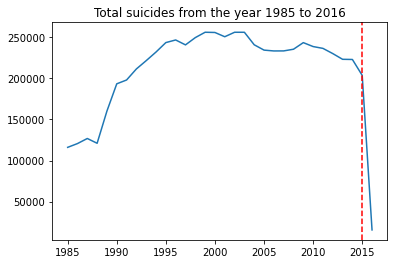

In [9]:
# make plot for total suicide number by year
year = df_suicide['year'].sort_values().unique()
df = df_suicide[['year', 'suicides_no']].groupby(['year']).sum()
df.reset_index(inplace=True) # reset index


plt.plot(df['year'], df['suicides_no'])
plt.title("Total suicides from the year 1985 to 2016")
plt.axvline(x = 2015, color = 'red', ls = '--')

In [10]:
#  drop year = 2016
print('before 2016 data drop:  ',df_suicide_new.shape)
df_suicide_new.drop(df_suicide_new[df_suicide_new['year'] == 2016].index, inplace = True)
print('after  2016 data drop:  ',df_suicide_new.shape)

before 2016 data drop:   (27820, 13)
after  2016 data drop:   (27660, 13)


In [11]:
# make sure all year = 2016 is dropped
len(df_suicide_new[df_suicide_new['year'] == 2016])

0

Text(0.5, 1.0, 'Total suicides by continents')

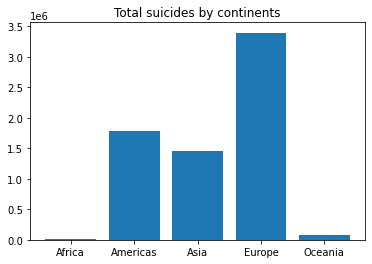

In [12]:
continent = df_suicide_new[['continent', 'suicides_no']].groupby(['continent']).sum()
continent.reset_index(inplace=True)

plt.bar(continent['continent'], continent['suicides_no'])
plt.title("Total suicides by continents")

In [13]:
df_suicide_new['country'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Montenegro', 'Netherlands', 'New Zealand',
       'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay', 'Philippines',
       'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Republic of Korea',
       'Romania', 'Russian Fede

In [14]:
df_suicide_new['year'].sort_values().unique()

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015], dtype=int64)

In [15]:
# rename column
df_suicide_new = df_suicide_new.rename(columns = {' gdp_for_year ($) ': 'gdp_for_year ($)'}, inplace = False)
df_suicide_new.info() # wrong type for 'gdp_for_year ($)' column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27660 entries, 0 to 27819
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27660 non-null  object 
 1   year                27660 non-null  int64  
 2   sex                 27660 non-null  object 
 3   age                 27660 non-null  object 
 4   suicides_no         27660 non-null  int64  
 5   population          27660 non-null  int64  
 6   suicides/100k pop   27660 non-null  float64
 7   country-year        27660 non-null  object 
 8   HDI for year        8364 non-null   float64
 9   gdp_for_year ($)    27660 non-null  object 
 10  gdp_per_capita ($)  27660 non-null  int64  
 11  generation          27660 non-null  object 
 12  continent           27660 non-null  object 
dtypes: float64(2), int64(4), object(7)
memory usage: 3.0+ MB


In [16]:
# Remove thousand separator for string at column 'gdp_for_year ($)' and change to int data type
for i, row in df_suicide_new.iterrows():
    ifor_val = int("".join(row['gdp_for_year ($)'].split(',')))
    df_suicide_new.at[i,'gdp_for_year ($)'] = ifor_val

# change data type of dataframe
df_suicide_new['gdp_for_year ($)'] = pd.to_numeric(df_suicide_new['gdp_for_year ($)']) # change data type
df_suicide_new['gdp_for_year ($)']

0         2156624900
1         2156624900
2         2156624900
3         2156624900
4         2156624900
            ...     
27815    63067077179
27816    63067077179
27817    63067077179
27818    63067077179
27819    63067077179
Name: gdp_for_year ($), Length: 27660, dtype: int64

In [17]:
# calculate average gdp by grouping country and finding the average
average_gdp = df_suicide_new[['country', 'gdp_for_year ($)']].groupby(['country']).mean()
average_gdp.reset_index(inplace=True)
average_gdp = average_gdp.rename(columns = {'gdp_for_year ($)': 'average_gdp'}, inplace = False)
df_suicide_new = df_suicide_new.merge(average_gdp[['country', 'average_gdp']])

# calculate total suicide by grouping country and finding the sum
total_suicides = df_suicide_new[['country', 'suicides_no']].groupby(['country']).sum()
total_suicides.reset_index(inplace=True)
total_suicides = total_suicides.rename(columns = {'suicides_no': 'total_suicides'}, inplace = False)
df_suicide_new = df_suicide_new.merge(total_suicides[['country', 'total_suicides']])

# calculate the average gdp per capita by grouping country and finding the average
average_gdp_per_capita = df_suicide_new[['country', 'gdp_per_capita ($)']].groupby(['country']).mean()
average_gdp_per_capita.reset_index(inplace=True)
average_gdp_per_capita = average_gdp_per_capita.rename(columns = {'gdp_per_capita ($)': 'average_gdp_per_capita'}, inplace = False)
df_suicide_new = df_suicide_new.merge(average_gdp_per_capita[['country', 'average_gdp_per_capita']])

# rounding to 2 d.p.
df_suicide_new = df_suicide_new.round({'average_gdp': 2, 'average_gdp_per_capita': 2})
df_suicide_new.reset_index(inplace = True)
df_suicide_new.info()

# the value found here has also been verified by tableau software

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27660 entries, 0 to 27659
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   27660 non-null  int64  
 1   country                 27660 non-null  object 
 2   year                    27660 non-null  int64  
 3   sex                     27660 non-null  object 
 4   age                     27660 non-null  object 
 5   suicides_no             27660 non-null  int64  
 6   population              27660 non-null  int64  
 7   suicides/100k pop       27660 non-null  float64
 8   country-year            27660 non-null  object 
 9   HDI for year            8364 non-null   float64
 10  gdp_for_year ($)        27660 non-null  int64  
 11  gdp_per_capita ($)      27660 non-null  int64  
 12  generation              27660 non-null  object 
 13  continent               27660 non-null  object 
 14  average_gdp             27660 non-null

In [18]:
# rename column to help with vega-lite
df_suicide_new = df_suicide_new.rename(columns = {'suicides/100k pop': 'suicides_per_100k_pop', \
                                                  'gdp_for_year ($)': 'gdp_for_year', \
                                                  'gdp_per_capita ($)': 'gdp_per_capita', \
                                                  'HDI for year': 'hdi_for_year', \
                                                  'country-year': 'country_year'}, inplace = False)

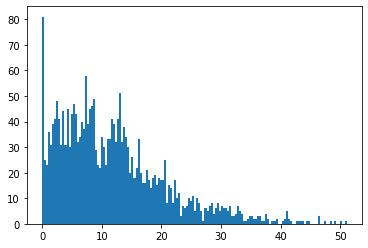

In [19]:
# find total_suicide by country and year
total_suicide_per_year = df_suicide_new[['country', 'year', 'suicides_no']].groupby(['country', 'year']).sum()
total_suicide_per_year.reset_index(inplace=True)

# find total population by country and year
total_population_per_year = df_suicide_new[['country', 'year', 'population']].groupby(['country', 'year']).sum()
total_population_per_year.reset_index(inplace=True)

per_country_per_year = total_suicide_per_year.merge(total_population_per_year[['country', 'year', 'population']])
per_country_per_year['suicide_per_100k_pop_year_country'] = (per_country_per_year['suicides_no'] / per_country_per_year['population']) * 100000
per_country_per_year = per_country_per_year.rename(columns = {'suicides_no': 'suicides_per_year', 'population': 'population_per_year'}, inplace = False)
per_country_per_year = per_country_per_year.round({'suicide_per_100k_pop_per_year': 2})

# merge into dataset
df_suicide_new = df_suicide_new.merge(per_country_per_year[['country', 'year', 'suicides_per_year', 'population_per_year', 'suicide_per_100k_pop_year_country']])

# plot distribution
plt.hist(per_country_per_year['suicide_per_100k_pop_year_country'], bins=150)
plt.show()


In [20]:
# find the total_suicide_per_100k_pop_per_year_per_continent
total_suicide_continent_year = df_suicide_new[['continent', 'year', 'suicides_per_year']].groupby(['continent', 'year']).sum()
total_suicide_continent_year = total_suicide_continent_year.reset_index()
total_population_continent_year = df_suicide_new[['continent', 'year', 'population_per_year']].groupby(['continent', 'year']).sum()
total_population_continent_year = total_population_continent_year.reset_index()

# merge it
per_continent_per_year = total_suicide_continent_year.merge(total_population_continent_year[['continent', 'year', 'population_per_year']])
per_continent_per_year['suicide_per_100k_pop_year_continent'] = (per_continent_per_year['suicides_per_year'] / per_continent_per_year['population_per_year']) * 100000

# merge into dataset
df_suicide_new = df_suicide_new.merge(per_continent_per_year[['continent', 'year', 'suicide_per_100k_pop_year_continent']])

# calculate the average suicide per 100k population by grouping country and finding the average
average_suicides_per_100k_pop = df_suicide_new[['country', 'suicide_per_100k_pop_year_country']].groupby(['country']).mean()
average_suicides_per_100k_pop.reset_index(inplace=True)
average_suicides_per_100k_pop = average_suicides_per_100k_pop.rename(columns = {'suicide_per_100k_pop_year_country': 'average_suicides_per_100k_pop'}, inplace = False)
df_suicide_new = df_suicide_new.merge(average_suicides_per_100k_pop[['country', 'average_suicides_per_100k_pop']])

# change to 2 d.p
df_suicide_new = df_suicide_new.round({'suicide_per_100k_pop_year_country': 2, 'suicide_per_100k_pop_year_continent': 2, 'average_suicides_per_100k_pop': 2})

In [22]:
# example record
df_suicide_new.loc[df_suicide_new['country'] == 'United States'].head(1)

,index,country,year,sex,age,suicides_no,population,suicides_per_100k_pop,country_year,hdi_for_year,...,generation,continent,average_gdp,total_suicides,average_gdp_per_capita,suicides_per_year,population_per_year,suicide_per_100k_pop_year_country,suicide_per_100k_pop_year_continent,average_suicides_per_100k_pop
17616,26688,United States,1985,male,75+ years,2177,4064000,53.57,United States1985,0.841,...,G.I. Generation,Americas,1.051071e+13,1034013,39269.61,29446,220723000,13.340703,8.410367,12.835303


In [23]:
df_suicide_new.head()

,index,country,year,sex,age,suicides_no,population,suicides_per_100k_pop,country_year,hdi_for_year,...,generation,continent,average_gdp,total_suicides,average_gdp_per_capita,suicides_per_year,population_per_year,suicide_per_100k_pop_year_country,suicide_per_100k_pop_year_continent,average_suicides_per_100k_pop
0,0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,...,Generation X,Europe,5.211661e+09,1970,1859.05,73,2709600,2.694125,14.473337,3.136985
1,1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,...,Silent,Europe,5.211661e+09,1970,1859.05,73,2709600,2.694125,14.473337,3.136985
2,2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,...,Generation X,Europe,5.211661e+09,1970,1859.05,73,2709600,2.694125,14.473337,3.136985
3,3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,...,G.I. Generation,Europe,5.211661e+09,1970,1859.05,73,2709600,2.694125,14.473337,3.136985
4,4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,...,Boomers,Europe,5.211661e+09,1970,1859.05,73,2709600,2.694125,14.473337,3.136985


# Making a new dataset suitable for Bubble plot

In [24]:
# Find the highest population in each country
df_bubble_plot = df_suicide_new[['country','year', 'population']].groupby(['country', 'year']).sum()
df_bubble_plot.reset_index(inplace=True)
df_bubble_plot = df_bubble_plot[['country', 'population']].groupby(['country']).max()
df_bubble_plot.reset_index(inplace=True)

# Match each country to their respective continent
df_bubble_plot = df_bubble_plot.merge(df_country[['country', 'continent']])
# Add the extra column we found above
df_bubble_plot = df_bubble_plot.merge(average_gdp[['country', 'average_gdp']])
df_bubble_plot = df_bubble_plot.merge(total_suicides[['country', 'total_suicides']])
df_bubble_plot = df_bubble_plot.merge(average_gdp_per_capita[['country', 'average_gdp_per_capita']])
df_bubble_plot = df_bubble_plot.merge(average_suicides_per_100k_pop[['country', 'average_suicides_per_100k_pop']])

# Round to 2 d.p place
df_bubble_plot = df_bubble_plot.round({'average_gdp': 2, 'average_gdp_per_capita': 2, 'average_suicides_per_100k_pop': 2})

df_bubble_plot

,country,population,continent,average_gdp,total_suicides,average_gdp_per_capita,average_suicides_per_100k_pop
0,Albania,3029700,Europe,5.211661e+09,1970,1859.05,3.14
1,Antigua and Barbuda,91889,Americas,8.035452e+08,11,10448.19,0.54
2,Argentina,39699624,Americas,2.742565e+11,82219,7914.10,7.91
3,Armenia,3610516,Asia,5.207441e+09,1838,1807.46,2.46
4,Aruba,95488,Americas,2.196223e+09,101,24221.64,8.10
...,...,...,...,...,...,...,...
95,United Arab Emirates,7839736,Asia,2.532432e+11,622,42162.00,1.75
96,United Kingdom,61082942,Europe,1.816067e+12,136805,31908.35,7.88
97,United States,300078511,Americas,1.051071e+13,1034013,39269.61,12.84
98,Uruguay,3190795,Americas,2.337827e+10,13138,7622.07,15.50


In [25]:
# export both dataset
df_suicide_new.to_csv('suicide-rates-1985-to-2015-dataset-cleaned.csv', index=False)
df_bubble_plot.to_csv('suicide-rates-1985-to-2015-dataset-cleaned-bubbleplot.csv', index=False)